# Modern Portfolio Theory - Practical Work
## L3 Finance


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
import seaborn as sns

### Part 1: Data Retrieval and Initial Processing

#### Question 1.1
We will work with a diversified portfolio of major stocks covering different sectors of the economy. Using the yfinance library, retrieve daily closing prices for the following stocks from January 1st, 2015 to January 1st, 2025:

*Hint:* Use `yf.download()` function with parameters:
- `tickers`: list or string of tickers
- `start`: start date
- `end`: end date
- `interval`: 'd' for daily data
- Use the 'Close' column


In [7]:
sector_mapping = {
    'Technology': ['AAPL', 'MSFT', 'INTC', 'CSCO', 'ORCL'],
    'Financial': ['JPM', 'BAC', 'GS', 'MS', 'C', 'AXP', 'WFC'],
    'Healthcare': ['JNJ', 'PFE', 'MRK', 'ABT', 'BMY'],
    'Energy': ['XOM', 'CVX', 'COP', 'SLB', 'OXY'],
    'Consumer_Staples': ['WMT', 'PG', 'KO', 'PEP', 'CL', 'KMB', 'GIS'],
    'Consumer_Discretionary': ['HD', 'MCD', 'NKE', 'SBUX', 'TJX', 'LOW', 'YUM'],
    'Industrial': ['CAT', 'BA', 'MMM', 'HON', 'GE', 'DE', 'FDX'],
    'Materials': ['APD', 'ECL', 'NEM', 'FCX', 'PPG', 'NUE'],
    'Telecommunications': ['VZ', 'T', 'CMCSA'],
    'Real_Estate': ['SPG', 'PSA']
}



start_date = '2010-01-01'
end_date = '2025-01-01'

#Retrieve tickers from dictionary
tickers = [ticker for ticker_list in sector_mapping.values() for ticker in ticker_list]

# Download the data
prices = yf.download(tickers,start=start_date,end=end_date, interval='1d')['Close']
print(prices.head())


[*********************100%***********************]  27 of 29 completed

29 Failed downloads:
['ABT', 'OXY', 'MSFT', 'SLB', 'JPM', 'COP', 'WFC', 'BMY', 'KMB', 'MS', 'GIS', 'CVX', 'MRK', 'GS', 'INTC', 'C', 'XOM', 'ORCL', 'AXP', 'PEP', 'AAPL', 'BAC', 'JNJ', 'CL', 'KO', 'PG', 'WMT', 'CSCO', 'PFE']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [AAPL, ABT, AXP, BAC, BMY, C, CL, COP, CSCO, CVX, GIS, GS, INTC, JNJ, JPM, KMB, KO, MRK, MS, MSFT, ORCL, OXY, PEP, PFE, PG, SLB, WFC, WMT, XOM]
Index: []

[0 rows x 29 columns]



#### Question 1.2
Calculate the daily returns for each asset. The daily return is defined as the percentage change in price from one day to the next.

*Hint:* 
- Use the `pct_change()` method from pandas
- Be sure to handle any missing values that might appear


In [5]:
#Calculate daily returns
returns = prices.pct_change()

#Drop missing values
returns = returns.dropna()

#Display summary statistics 
print("\nSummary statistics of daily returns: ")
print(returns.describe())



Summary statistics of daily returns: 
Ticker  AAPL  ABT  APD  AXP   BA  BAC  BMY    C  CAT   CL  ...  SBUX  SLB  \
count    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
mean     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
std      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
min      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
25%      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
50%      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
75%      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
max      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   

Ticker  SPG    T  TJX   VZ  WFC  WMT  XOM  YUM  
count   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
25%     NaN  NaN  NaN 


#### Question 1.3
Create a visualization of the correlation between the assets using a heatmap. Also, compute and display the covariance matrix.

*Hint:*
- Use `seaborn.heatmap()` for visualization
- Use `returns.corr()` for correlation matrix
- Use `returns.cov()` for covariance matrix



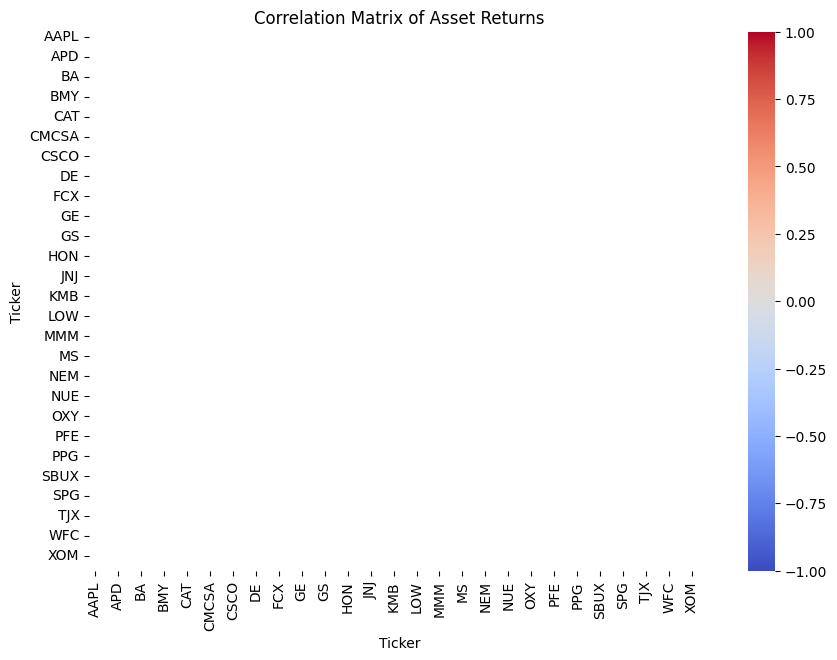


Covariance Matrix:
Ticker  AAPL  ABT  APD  AXP  BA  BAC  BMY   C  CAT  CL  ...  SBUX  SLB  SPG  \
Ticker                                                  ...                   
AAPL     NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
ABT      NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
APD      NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
AXP      NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
BA       NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
BAC      NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
BMY      NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
C        NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
CAT      NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
CL       NaN  NaN  NaN  NaN NaN  NaN  NaN NaN  NaN NaN  ...   NaN  NaN  NaN   
CMCSA    NaN  NaN  NaN  NaN NaN 

/Users/vuanhtuan/.pyenv/versions/3.13.1/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/vuanhtuan/.pyenv/versions/3.13.1/lib/python3.13/site-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/vuanhtuan/.pyenv/versions/3.13.1/lib/python3.13/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/Users/vuanhtuan/.pyenv/versions/3.13.1/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/vuanhtuan/.pyenv/versions/3.13.1/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [5]:
#Compute correlation matrix
corr_mat = returns.corr()

#Create a heatmap 

plt.figure(figsize=(10,7))
sns.heatmap(corr_mat, annot = False, cmap = 'coolwarm', vmin= -1, vmax = 1, center = 0)
plt.title('Correlation Matrix of Asset Returns')
plt.show()

#Compute and display covariance matrix
cov_mat = returns.cov()
print("\nCovariance Matrix:")
print(cov_mat)


#### Question 1.4
Create a plot showing the evolution of prices for all assets on the same graph. Make sure to normalize the prices to start at 100 to make them comparable.

*Hint:*
- Normalize prices by dividing by the initial price and multiplying by 100
- Use matplotlib's plot function
- Add a legend to distinguish between assets


In [6]:
# Normalize prices 
norm_prices = prices / prices.iloc[0] * 100
#norm_prices = new df filled with normalized prices, with dates as index

#Create plot
plt.figure(figsize=(12,6))
for column in norm_prices.columns:
    plt.plot(norm_prices.index, norm_prices[column], label = column)
    #each column correspond to a ticker

plt.title('Normalized Price Evolution (Base 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

IndexError: single positional indexer is out-of-bounds

### Part 2: Portfolio Construction and Analysis



#### Question 2.1
Create an equally-weighted portfolio from our five assets. Calculate its daily returns and analyze its performance metrics (mean return, volatility, Sharpe ratio assuming risk-free rate = 0).

*Hint:*
- Equal weights means 1/N for each asset
- Portfolio return is the weighted sum of individual returns
- Portfolio volatility requires using the covariance matrix


In [10]:
#Create equal weights
n_assets = len(tickers)
weights_equal = np.array([1/n_assets] * n_assets)

#Calculate portfolio returns
ptf_returns = returns @ weights_equal

#Calculate ptf metrics
ptf_mean_return = ptf_returns.mean()
ptf_volatility = np.sqrt(weights_equal.T @ cov_mat @ weights_equal)
sharpe_ratio = ptf_mean_return/ptf_volatility 

print(f"Equal-weighted Portfolio Metrics (daily):")
print(f"Mean Return: {ptf_mean_return:.4%}")
print(f"Volatility: {ptf_volatility:.4%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Equal-weighted Portfolio Metrics (daily):
Mean Return: 0.0556%
Volatility: 1.0755%
Sharpe Ratio: 0.0517



#### Question 2.2
Write a function that computes the mean return and volatility of a portfolio given:
- A set of weights
- The mean returns of individual assets
- The covariance matrix of returns

*Hint:*
- Portfolio return = weighted sum of individual returns
- Portfolio variance = w^T * Σ * w (where Σ is the covariance matrix)


In [11]:
def ptf_metrics(weights,mean_returns,cov_mat_returns):
    ptf_return = np.sum(weights * mean_returns)
    ptf_volatility = np.sqrt(weights.T @ cov_mat_returns @ weights)
    return ptf_return, ptf_volatility

# Test the function with equal weights
mean_returns = returns.mean()
test_metrics = ptf_metrics(weights_equal, mean_returns, cov_mat)
print("\nTest with equal weights:")
print(f"Portfolio Return: {test_metrics[0]:.4%}")
print(f"Portfolio Volatility: {test_metrics[1]:.4%}")


Test with equal weights:
Portfolio Return: 0.0556%
Portfolio Volatility: 1.0755%



#### Question 2.3
Split your data into two periods: training (2020-2021) and testing (2022-2023). Calculate the mean returns and covariance matrix for the training period.

*Hint:*
- Use datetime index to split the data
- Recalculate all metrics on the training set


In [15]:
# Split the data
split_date = '2020-01-01'
train_returns = returns[returns.index < split_date]
test_returns = returns[returns.index >= split_date]

# Calculate metrics for training period
train_mean_returns = train_returns.mean()
train_cov_matrix = train_returns.cov()

print("Training Period Statistics:")
print("\nMean Returns:")
print(train_mean_returns)
print("\nCovariance Matrix:")
print(train_cov_matrix)

Training Period Statistics:

Mean Returns:
Ticker
AAPL     0.001087
ABT      0.000644
APD      0.000630
AXP      0.000605
BA       0.000918
BAC      0.000574
BMY      0.000599
C        0.000563
CAT      0.000624
CL       0.000349
CMCSA    0.000832
COP      0.000472
CSCO     0.000489
CVX      0.000404
DE       0.000664
ECL      0.000692
FCX      0.000109
FDX      0.000395
GE       0.000142
GIS      0.000354
GS       0.000303
HD       0.000980
HON      0.000778
INTC     0.000661
JNJ      0.000488
JPM      0.000689
KMB      0.000510
KO       0.000430
LOW      0.000846
MCD      0.000623
MMM      0.000477
MRK      0.000569
MS       0.000478
MSFT     0.000845
NEM      0.000262
NKE      0.000887
NUE      0.000329
ORCL     0.000459
OXY      0.000020
PEP      0.000477
PFE      0.000502
PG       0.000453
PPG      0.000765
PSA      0.000599
SBUX     0.000982
SLB      0.000046
SPG      0.000505
T        0.000470
TJX      0.000900
VZ       0.000514
WFC      0.000488
WMT      0.000470
XOM      0.000

#### Question 2.4
Create a function to generate random portfolio weights and use it to create the efficient frontier visualization. Generate 1000 random portfolios and plot them on a risk-return graph.

*Hint:*
- Use np.random.random() to generate weights
- Normalize weights to sum to 1
- Store results in arrays for plotting
- Highlight the minimum variance and maximum Sharpe ratio portfolios


In [ ]:
def gen_rand_weights(n_assets):
    weights = np.random.random(n_assets)
    return weights / np.sum(weights)

#Generate random portfolios
n_ptf = 100000
results = np.zeros((n_ptf,3)) 
#store return, volatility and sharpe ratio

for i in range (n_ptf):
    weights = gen_rand_weights(n_assets)
    ret, vol = ptf_metrics(weights, train_mean_returns, train_cov_matrix)
    sharpe = ret / vol
    results[i] = [ret, vol, sharpe]

#plot results 
plt.figure(figsize=(10, 6))
plt.scatter(results[:, 1], results[:, 0], 
           c=results[:, 2], cmap='viridis', 
           marker='o', s=10, alpha=0.3)

plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier of Random Portfolios')

# Plot equal weight portfolio
equal_ret, equal_vol = ptf_metrics(weights_equal, 
                                       train_mean_returns, 
                                       train_cov_matrix)
plt.scatter(equal_vol, equal_ret, 
           color='red', marker='*', s=200, 
           label='Equal Weight Portfolio')

plt.legend()
plt.grid(True)
plt.show()



#### Question 2.5
Use scipy's optimize function to find the minimum variance portfolio and the maximum Sharpe ratio portfolio. Make sure to include the constraint that weights must sum to 1 and be non-negative.

*Hint:*
- Use scipy.optimize.minimize
- Define objective functions for minimum variance and maximum Sharpe ratio
- Use SLSQP optimizer
- Check the optimization success flag


In [1]:
def objective_variance(weights):
    return ptf_metrics(weights, train_mean_returns, train_cov_matrix)

def objective_sharpe(weights):
    ret, vol = ptf_metrics(weights, train_mean_returns, train_cov_matrix)
    return -ret/vol  # Negative because we minimize

#Constraints 
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # weights sum to 1

bounds = tuple((0, 1) for _ in range(n_assets))  # weights between 0 and 1

# Find minimum variance portfolio
min_var_result = minimize(objective_variance, weights_equal,
                         method='SLSQP',
                         bounds=bounds,
                         constraints=constraints)

if not min_var_result.success:
    print("Warning: Minimum variance optimization did not converge!")

# Find maximum Sharpe ratio portfolio
max_sharpe_result = minimize(objective_sharpe, weights_equal,
                           method='SLSQP',
                           bounds=bounds,
                           constraints=constraints)

if not max_sharpe_result.success:
    print("Warning: Maximum Sharpe optimization did not converge!")

# Print results
print("\nMinimum Variance Portfolio:")
for ticker, weight in zip(tickers, min_var_result.x):
    print(f"{ticker}: {weight:.4f}")
ret, vol = portfolio_metrics(min_var_result.x, train_mean_returns, train_cov_matrix)
print(f"Expected Return: {ret:.4%}")
print(f"Volatility: {vol:.4%}")

print("\nMaximum Sharpe Ratio Portfolio:")
for ticker, weight in zip(tickers, max_sharpe_result.x):
    print(f"{ticker}: {weight:.4f}")
ret, vol = portfolio_metrics(max_sharpe_result.x, train_mean_returns, train_cov_matrix)
print(f"Expected Return: {ret:.4%}")
print(f"Volatility: {vol:.4%}")


NameError: name 'n_assets' is not defined

#### Question 2.6
Backtest your optimized portfolios (minimum variance and maximum Sharpe ratio) on the test period. Compare their performance with the equally-weighted portfolio.

*Hint:*
- Use the weights found in the training period
- Calculate cumulative returns for each portfolio
- Plot the evolution of portfolio values
- Calculate key performance metrics (return, volatility, Sharpe ratio, maximum drawdown)


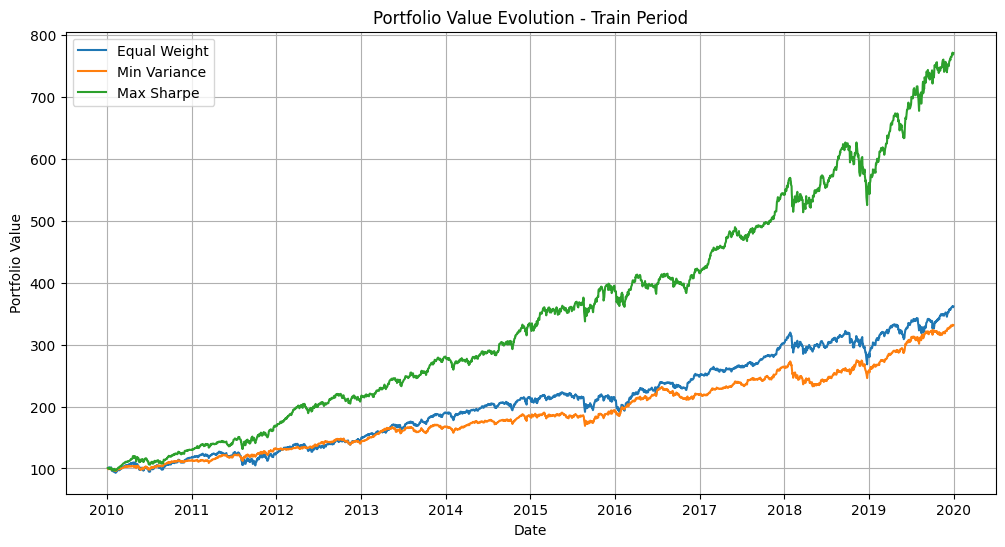


Train Period Performance:

Equal Weight:
Mean Return: 0.0553%
Volatility: 0.9158%
Sharpe Ratio: 6.0422%
Cumulative Return: 261.7286%

Min Variance:
Mean Return: 0.0499%
Volatility: 0.6731%
Sharpe Ratio: 7.4197%
Cumulative Return: 231.6049%

Max Sharpe:
Mean Return: 0.0850%
Volatility: 0.8703%
Sharpe Ratio: 9.7722%
Cumulative Return: 671.2589%


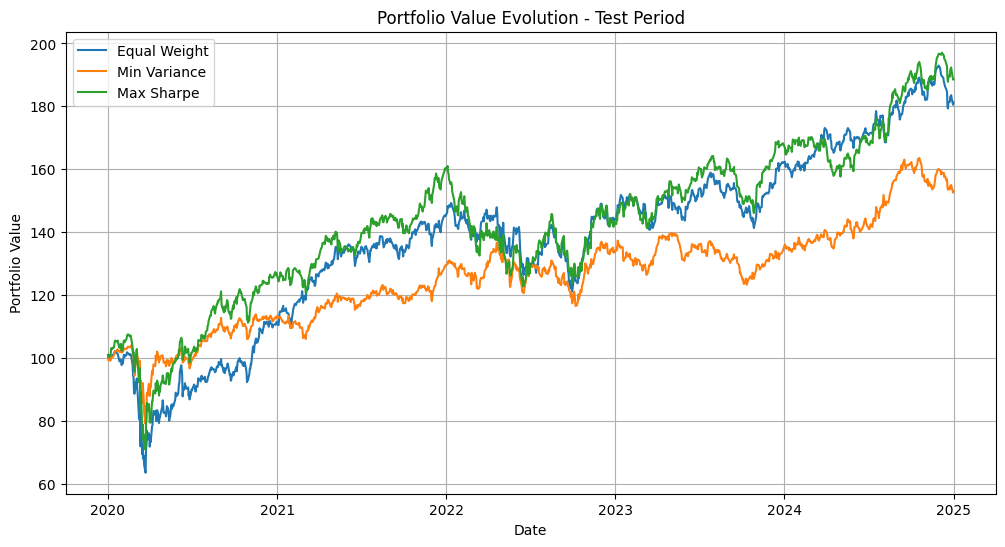


Test Period Performance:

Equal Weight:
Mean Return: 0.0563%
Volatility: 1.3392%
Sharpe Ratio: 4.2020%
Cumulative Return: 81.2116%

Min Variance:
Mean Return: 0.0390%
Volatility: 1.0081%
Sharpe Ratio: 3.8640%
Cumulative Return: 53.1191%

Max Sharpe:
Mean Return: 0.0595%
Volatility: 1.3445%
Sharpe Ratio: 4.4278%
Cumulative Return: 88.5475%


In [11]:
def calculate_portfolio_value(weights, returns):
    """Calculate portfolio value evolution starting at 100"""
    portfolio_returns = returns @ weights
    return 100 * (1 + portfolio_returns).cumprod()


# Calculate performance metrics for test period
def calculate_metrics(returns):
    mean_ret = returns.mean()
    vol = returns.std()
    sharpe = mean_ret / vol
    cum_ret = (1 + returns).prod() - 1
    return {'Mean Return': mean_ret,
            'Volatility': vol,
            'Sharpe Ratio': sharpe,
            'Cumulative Return': cum_ret}

# Calculate portfolio values for each strategy
train_equal = calculate_portfolio_value(weights_equal, train_returns)
train_min_var = calculate_portfolio_value(min_var_result.x, train_returns)
train_max_sharpe = calculate_portfolio_value(max_sharpe_result.x, train_returns)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train_equal.index, train_equal, label='Equal Weight')
plt.plot(train_min_var.index, train_min_var, label='Min Variance')
plt.plot(train_max_sharpe.index, train_max_sharpe, label='Max Sharpe')

plt.title('Portfolio Value Evolution - Train Period')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()


# Calculate and display metrics for each portfolio
portfolios = {
    'Equal Weight': weights_equal,
    'Min Variance': min_var_result.x,
    'Max Sharpe': max_sharpe_result.x
}

print("\nTrain Period Performance:")
for name, weights in portfolios.items():
    portfolio_returns = train_returns @ weights
    metrics = calculate_metrics(portfolio_returns)
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4%}")


# Calculate portfolio values for each strategy
test_equal = calculate_portfolio_value(weights_equal, test_returns)
test_min_var = calculate_portfolio_value(min_var_result.x, test_returns)
test_max_sharpe = calculate_portfolio_value(max_sharpe_result.x, test_returns)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_equal.index, test_equal, label='Equal Weight')
plt.plot(test_min_var.index, test_min_var, label='Min Variance')
plt.plot(test_max_sharpe.index, test_max_sharpe, label='Max Sharpe')

plt.title('Portfolio Value Evolution - Test Period')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()


# Calculate and display metrics for each portfolio
portfolios = {
    'Equal Weight': weights_equal,
    'Min Variance': min_var_result.x,
    'Max Sharpe': max_sharpe_result.x
}

print("\nTest Period Performance:")
for name, weights in portfolios.items():
    portfolio_returns = test_returns @ weights
    metrics = calculate_metrics(portfolio_returns)
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4%}")

### Part 3: Sector-Based Portfolio Analysis

## Question 3.1: Creating Sector Returns
Create sector-based returns by averaging returns of stocks within the same sector. First, define sector mappings, then compute their historical returns using our existing returns data.

*Hint:*
- Define a dictionary mapping sectors to their constituent stocks
- Use pandas `mean()` function to compute average returns
- Remember to handle the train/test split consistently with previous analysis

In [12]:
# Define sector mappings
sector_mapping = {
    'Technology': ['AAPL', 'MSFT', 'INTC', 'CSCO', 'ORCL'],
    'Financial': ['JPM', 'BAC', 'GS', 'MS', 'C', 'AXP', 'WFC'],
    'Healthcare': ['JNJ', 'PFE', 'MRK', 'ABT', 'BMY'],
    'Energy': ['XOM', 'CVX', 'COP', 'SLB', 'OXY'],
    'Consumer_Staples': ['WMT', 'PG', 'KO', 'PEP', 'CL', 'KMB', 'GIS'],
    'Consumer_Discretionary': ['HD', 'MCD', 'NKE', 'SBUX', 'TJX', 'LOW', 'YUM'],
    'Industrial': ['CAT', 'BA', 'MMM', 'HON', 'GE', 'DE', 'FDX'],
    'Materials': ['APD', 'ECL', 'NEM', 'FCX', 'PPG', 'NUE'],
    'Telecommunications': ['VZ', 'T', 'CMCSA'],
    'Real_Estate': ['SPG', 'PSA']
}


# Calculate sector returns
sector_returns = pd.DataFrame()
for sector, stocks in sector_mapping.items():
    sector_returns[sector] = returns[stocks].mean(axis=1)

# Split into training and testing periods
train_sector_returns = sector_returns[returns.index < split_date]
test_sector_returns = sector_returns[returns.index >= split_date]

# Display summary statistics for training period
print("Sector Returns Summary (Training Period):")
print(train_sector_returns.describe())

# Display correlations between sectors
print("\nSector Return Correlations (Training Period):")
print(train_sector_returns.corr())

Sector Returns Summary (Training Period):
        Technology    Financial   Healthcare       Energy  Consumer_Staples  \
count  2515.000000  2515.000000  2515.000000  2515.000000       2515.000000   
mean      0.000708     0.000529     0.000561     0.000228          0.000435   
std       0.011622     0.015460     0.009070     0.013255          0.007475   
min      -0.056637    -0.120743    -0.048842    -0.080151         -0.039052   
25%      -0.004963    -0.006888    -0.004165    -0.006827         -0.003661   
50%       0.000966     0.000601     0.000699     0.000480          0.000543   
75%       0.006897     0.008406     0.005836     0.007352          0.004696   
max       0.063131     0.090448     0.049754     0.058274          0.035414   

       Consumer_Discretionary   Industrial    Materials  Telecommunications  \
count             2515.000000  2515.000000  2515.000000         2515.000000   
mean                 0.000850     0.000571     0.000464            0.000605   
std      

## Question 3.2: Weight Conversion Function
Create and test a function that converts sector-level portfolio weights into individual stock weights, assuming equal weighting within each sector.

*Hint:*
- Each stock within a sector should have equal weight
- The sum of all stock weights should equal 1
- Test the function with simple cases


In [13]:

def sector_to_stock_weights(sector_weights, sector_mapping):
    """
    Convert sector weights to individual stock weights

    Parameters:
    sector_weights: array-like, weights for each sector
    sector_mapping: dict, mapping sectors to stock lists

    Returns:
    dict: Individual stock weights
    """
    stock_weights = {}
    
    for sector, weight in zip(sector_mapping.keys(), sector_weights):
        stocks_in_sector = sector_mapping[sector]
        weight_per_stock = weight / len(stocks_in_sector)
        
        for stock in stocks_in_sector:
            stock_weights[stock] = weight_per_stock
            
    return stock_weights

# Test 1: Equal weights across sectors
print("Test 1: Equal sector weights")
n_sectors = len(sector_mapping)
equal_weights = np.ones(n_sectors) / n_sectors

print("\nSector weights:")
for sector, weight in zip(sector_mapping.keys(), equal_weights):
    print(f"{sector}: {weight:.4f}")

equal_stock_weights = sector_to_stock_weights(equal_weights, sector_mapping)
print("\nResulting stock weights:")
for stock, weight in equal_stock_weights.items():
    print(f"{stock}: {weight:.4f}")

# Test 2: Different sector weights
print("\nTest 2: Custom sector weights")
custom_weights = np.array([0.3, 0.2, 0.2, 0.1, 0.1, 0.1])
print("\nSector weights:")
for sector, weight in zip(sector_mapping.keys(), custom_weights):
    print(f"{sector}: {weight:.4f}")

custom_stock_weights = sector_to_stock_weights(custom_weights, sector_mapping)
print("\nResulting stock weights:")
for stock, weight in custom_stock_weights.items():
    print(f"{stock}: {weight:.4f}")

# Verify weights sum to 1
print(f"\nVerification - sum of weights: {sum(custom_stock_weights.values()):.6f}")

Test 1: Equal sector weights

Sector weights:
Technology: 0.1000
Financial: 0.1000
Healthcare: 0.1000
Energy: 0.1000
Consumer_Staples: 0.1000
Consumer_Discretionary: 0.1000
Industrial: 0.1000
Materials: 0.1000
Telecommunications: 0.1000
Real_Estate: 0.1000

Resulting stock weights:
AAPL: 0.0200
MSFT: 0.0200
INTC: 0.0200
CSCO: 0.0200
ORCL: 0.0200
JPM: 0.0143
BAC: 0.0143
GS: 0.0143
MS: 0.0143
C: 0.0143
AXP: 0.0143
WFC: 0.0143
JNJ: 0.0200
PFE: 0.0200
MRK: 0.0200
ABT: 0.0200
BMY: 0.0200
XOM: 0.0200
CVX: 0.0200
COP: 0.0200
SLB: 0.0200
OXY: 0.0200
WMT: 0.0143
PG: 0.0143
KO: 0.0143
PEP: 0.0143
CL: 0.0143
KMB: 0.0143
GIS: 0.0143
HD: 0.0143
MCD: 0.0143
NKE: 0.0143
SBUX: 0.0143
TJX: 0.0143
LOW: 0.0143
YUM: 0.0143
CAT: 0.0143
BA: 0.0143
MMM: 0.0143
HON: 0.0143
GE: 0.0143
DE: 0.0143
FDX: 0.0143
APD: 0.0167
ECL: 0.0167
NEM: 0.0167
FCX: 0.0167
PPG: 0.0167
NUE: 0.0167
VZ: 0.0333
T: 0.0333
CMCSA: 0.0333
SPG: 0.0500
PSA: 0.0500

Test 2: Custom sector weights

Sector weights:
Technology: 0.3000
Financia


## Question 3.3: Sector Portfolio Optimization
Using the training period data, optimize sector-based portfolios for minimum variance and maximum Sharpe ratio. Compare with an equal-weight sector allocation.

*Hint:*
- Use the same optimization approach as in Part 2
- Remember to create new constraints for the number of sectors
- Use only training period data for optimization

In [14]:
# Calculate training period metrics
train_sector_mean_returns = train_sector_returns.mean()
train_sector_cov_matrix = train_sector_returns.cov()

# Define optimization constraints for sectors
n_sectors = len(sector_mapping)
sector_constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
sector_bounds = tuple((0, 1) for _ in range(n_sectors))

# Optimize minimum variance portfolio
sector_min_var_result = minimize(
    lambda w: portfolio_metrics(w, train_sector_mean_returns, train_sector_cov_matrix)[1],
    np.ones(n_sectors)/n_sectors,
    constraints=sector_constraints,
    bounds=sector_bounds,
    method='SLSQP'
)

# Optimize maximum Sharpe ratio portfolio
sector_max_sharpe_result = minimize(
    lambda w: -portfolio_metrics(w, train_sector_mean_returns, train_sector_cov_matrix)[0]/
             portfolio_metrics(w, train_sector_mean_returns, train_sector_cov_matrix)[1],
    np.ones(n_sectors)/n_sectors,
    constraints=sector_constraints,
    bounds=sector_bounds,
    method='SLSQP'
)

# Print optimization results
print("Minimum Variance Portfolio Weights:")
for sector, weight in zip(sector_mapping.keys(), sector_min_var_result.x):
    print(f"{sector}: {weight:.4f}")

print("\nMaximum Sharpe Ratio Portfolio Weights:")
for sector, weight in zip(sector_mapping.keys(), sector_max_sharpe_result.x):
    print(f"{sector}: {weight:.4f}")

Minimum Variance Portfolio Weights:
Technology: 0.0000
Financial: 0.0000
Healthcare: 0.2300
Energy: 0.0000
Consumer_Staples: 0.4999
Consumer_Discretionary: 0.0869
Industrial: 0.0000
Materials: 0.0000
Telecommunications: 0.1832
Real_Estate: 0.0000

Maximum Sharpe Ratio Portfolio Weights:
Technology: 0.0000
Financial: 0.0000
Healthcare: 0.0861
Energy: 0.0000
Consumer_Staples: 0.0000
Consumer_Discretionary: 0.7308
Industrial: 0.0000
Materials: 0.0000
Telecommunications: 0.1831
Real_Estate: 0.0000


## Question 3.4: Portfolio Visualization
Create visualizations to compare the sector allocations and corresponding stock allocations for each portfolio strategy.

*Hint:*
- Use pie charts to show both sector and stock level allocations
- Use the sector_to_stock_weights function from Question 3.2
- Consider using subplots for clear comparison

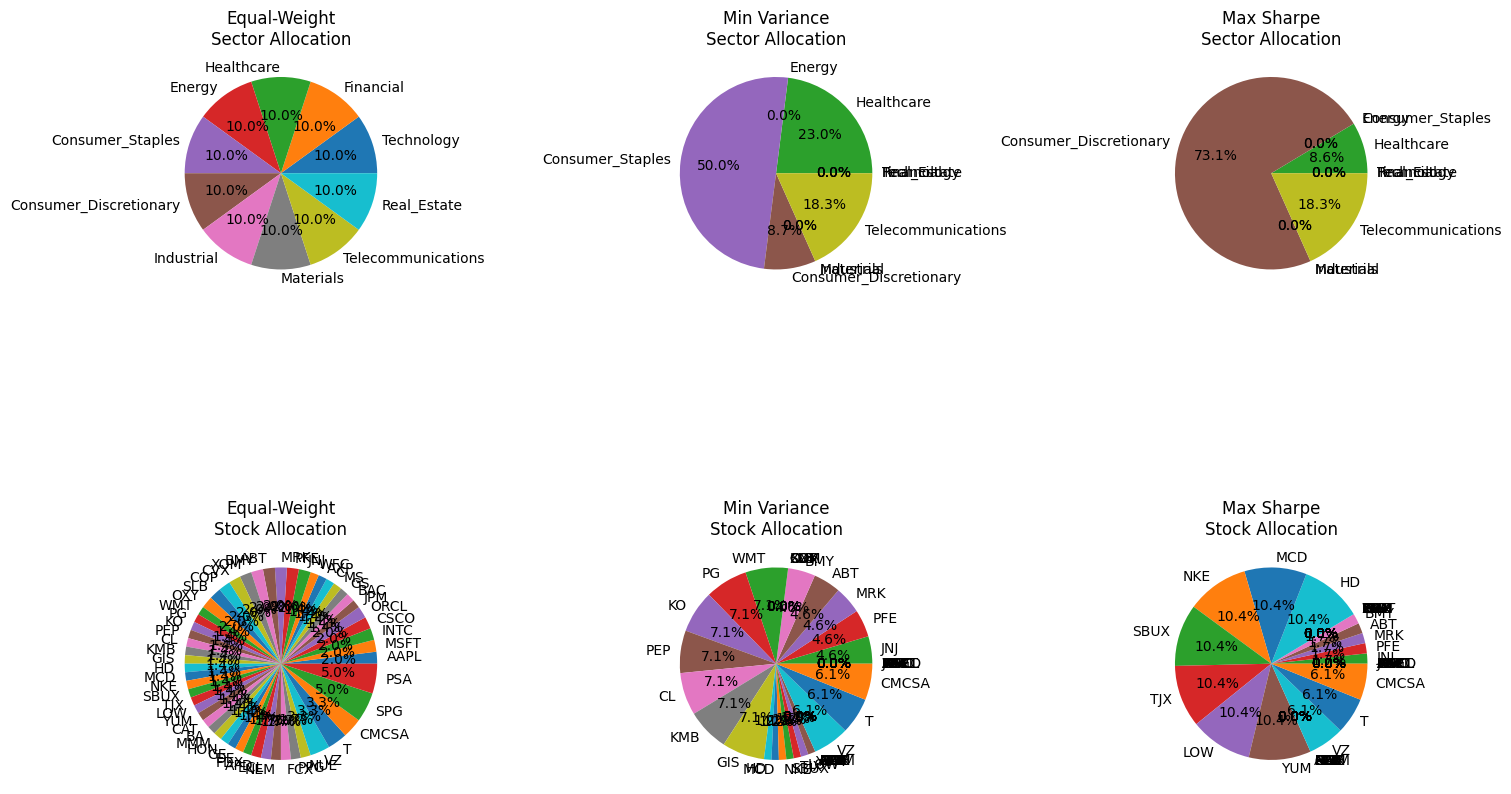

In [15]:
# Define portfolio strategies
portfolios = {
    'Equal-Weight': np.ones(n_sectors)/n_sectors,
    'Min Variance': sector_min_var_result.x,
    'Max Sharpe': sector_max_sharpe_result.x
}

# Create visualization
plt.figure(figsize=(15, 10))

for idx, (name, weights) in enumerate(portfolios.items(), 1):
    # Sector weights
    plt.subplot(2, 3, idx)
    plt.pie(weights, labels=sector_mapping.keys(), autopct='%1.1f%%')
    plt.title(f'{name}\nSector Allocation')
    
    # Stock weights
    plt.subplot(2, 3, idx+3)
    stock_weights = sector_to_stock_weights(weights, sector_mapping)
    plt.pie(list(stock_weights.values()), 
            labels=list(stock_weights.keys()), 
            autopct='%1.1f%%')
    plt.title(f'{name}\nStock Allocation')

plt.tight_layout()
plt.show()

# Part 4: Risk Analysis


## Question 4.1: Risk Metrics Function
Create a function to calculate various risk metrics for a return series:
- Maximum Drawdown
- Sortino Ratio
- Value at Risk (VaR)
- Conditional Value at Risk (CVaR)

*Hint:*
- Use cumulative returns for drawdown calculation
- Consider using numpy percentile for VaR
- Remember to annualize metrics where appropriate


In [16]:

def calculate_risk_metrics(returns, rf_rate=0.02/252):  # Default daily risk-free rate
    """
    Calculate various risk metrics for a return series
    
    Parameters:
    returns: Series of returns
    rf_rate: Daily risk-free rate
    
    Returns:
    dict: Dictionary of risk metrics
    """
    # Maximum Drawdown
    cum_returns = (1 + returns).cumprod()
    running_max = cum_returns.cummax()
    drawdowns = (cum_returns - running_max) / running_max
    max_drawdown = drawdowns.min()
    
    # Sortino Ratio
    excess_returns = returns - rf_rate
    downside_returns = returns[returns < 0]
    downside_std = np.std(downside_returns, ddof=1)
    sortino = np.sqrt(252) * excess_returns.mean() / downside_std
    
    # Value at Risk (95%)
    var_95 = np.percentile(returns, 5)
    
    # Conditional Value at Risk (Expected Shortfall)
    cvar_95 = returns[returns <= var_95].mean()
    
    return {
        'Maximum Drawdown': max_drawdown,
        'Sortino Ratio': sortino,
        'VaR (95%)': var_95,
        'CVaR (95%)': cvar_95
    }

# Test the function on training data
print("Risk Metrics for Equal-Weight Sector Portfolio (Training Period):")
equal_weight_returns = train_sector_returns @ (np.ones(n_sectors)/n_sectors)
metrics = calculate_risk_metrics(equal_weight_returns)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Risk Metrics for Equal-Weight Sector Portfolio (Training Period):
Maximum Drawdown: -0.1618
Sortino Ratio: 1.0901
VaR (95%): -0.0144
CVaR (95%): -0.0216


## Question 4.2: CAPM Analysis
Calculate CAPM metrics (alpha and beta) for sector portfolios. Compare the risk-adjusted performance across different portfolio strategies.

*Hint:*
- Download market data (S&P 500) for the same period
- Use linear regression to calculate beta
- Remember to annualize alpha

In [17]:
import statsmodels.api as sm

# Download market data
market_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']
market_returns = market_data.pct_change().dropna()

def calculate_capm_metrics(returns, market_returns, rf_rate=0.02/252):
    """
    Calculate CAPM metrics
    
    Returns:
    tuple: (alpha, beta)
    """
    # Prepare data for regression
    excess_returns = returns - rf_rate
    excess_market_returns = market_returns - rf_rate
    
    # Add constant for regression
    X = sm.add_constant(excess_market_returns)
    
    # Perform regression
    model = sm.OLS(excess_returns, X).fit()
    
    # Extract and annualize alpha
    alpha = model.params[0] * 252
    beta = model.params[1]
    
    return alpha, beta

# Calculate CAPM metrics for each portfolio
for name, weights in portfolios.items():
    print(f"\n{name} Portfolio CAPM Metrics:")
    
    # Training period
    portfolio_returns = train_sector_returns @ weights
    train_market_returns = market_returns[market_returns.index < split_date]
    alpha, beta = calculate_capm_metrics(portfolio_returns, train_market_returns)
    print(f"Training Period - Alpha: {alpha:.4%}, Beta: {beta:.4f}")
    
    # Testing period
    portfolio_returns = test_sector_returns @ weights
    test_market_returns = market_returns[market_returns.index >= split_date]
    alpha, beta = calculate_capm_metrics(portfolio_returns, test_market_returns)
    print(f"Testing Period - Alpha: {alpha:.4%}, Beta: {beta:.4f}")

[*********************100%***********************]  1 of 1 completed


Equal-Weight Portfolio CAPM Metrics:
Training Period - Alpha: 2.8582%, Beta: 0.9390
Testing Period - Alpha: 0.6888%, Beta: 0.9013

Min Variance Portfolio CAPM Metrics:
Training Period - Alpha: 5.2233%, Beta: 0.6415
Testing Period - Alpha: -1.0409%, Beta: 0.5726

Max Sharpe Portfolio CAPM Metrics:
Training Period - Alpha: 9.7843%, Beta: 0.8203
Testing Period - Alpha: -1.7344%, Beta: 0.8535



/var/folders/dr/3gd86y8j4w19p8jdnqy5s65m0000gp/T/ipykernel_70455/2328182781.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0] * 252
/var/folders/dr/3gd86y8j4w19p8jdnqy5s65m0000gp/T/ipykernel_70455/2328182781.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/dr/3gd86y8j4w19p8jdnqy5s65m0000gp/T/ipykernel_70455/2328182781.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

## Question 4.3: Performance Comparison
Compare the performance of sector-based portfolios with the individual stock portfolios from Part 2. Create visualizations showing the cumulative returns and risk metrics for both approaches.

*Hint:*
- Use the optimal portfolios from both Parts 2 and 3
- Plot cumulative returns on the same graph
- Create a summary table of risk metrics

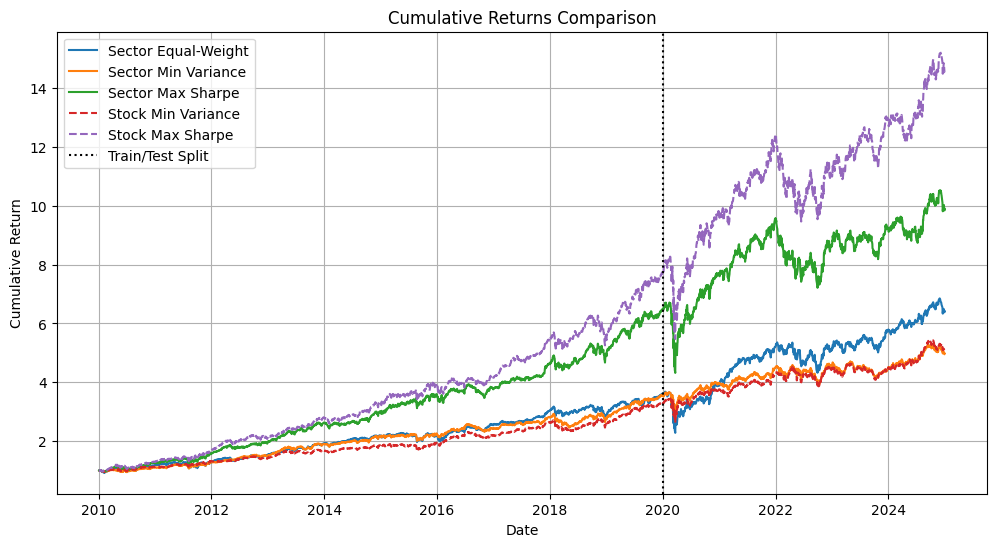


Risk Metrics Comparison (Testing Period):

Sector Equal-Weight:
Maximum Drawdown: -0.3801
Sortino Ratio: 0.6716
VaR (95%): -0.0170
CVaR (95%): -0.0311

Sector Min Variance:
Maximum Drawdown: -0.2407
Sortino Ratio: 0.4855
VaR (95%): -0.0136
CVaR (95%): -0.0229

Sector Max Sharpe:
Maximum Drawdown: -0.3563
Sortino Ratio: 0.5206
VaR (95%): -0.0174
CVaR (95%): -0.0301

Stock Min Variance:
Maximum Drawdown: -0.2395
Sortino Ratio: 0.6236
VaR (95%): -0.0134
CVaR (95%): -0.0226

Stock Max Sharpe:
Maximum Drawdown: -0.3405
Sortino Ratio: 0.7347
VaR (95%): -0.0177
CVaR (95%): -0.0309


In [18]:
# Calculate cumulative returns for all portfolios
plt.figure(figsize=(12, 6))

# Plot sector portfolios
for name, weights in portfolios.items():
    portfolio_returns = pd.concat([
        train_sector_returns @ weights,
        test_sector_returns @ weights
    ])
    cum_returns = (1 + portfolio_returns).cumprod()
    plt.plot(cum_returns.index, cum_returns, 
             label=f'Sector {name}', linestyle='-')

# Plot individual stock portfolios from Part 2
individual_portfolios = {
    'Min Variance': min_var_result.x,
    'Max Sharpe': max_sharpe_result.x
}

for name, weights in individual_portfolios.items():
    portfolio_returns = returns @ weights
    cum_returns = (1 + portfolio_returns).cumprod()
    plt.plot(cum_returns.index, cum_returns, 
             label=f'Stock {name}', linestyle='--')

plt.axvline(x=pd.to_datetime(split_date), color='black', 
            linestyle=':', label='Train/Test Split')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Compare risk metrics
print("\nRisk Metrics Comparison (Testing Period):")
all_portfolios = {
    'Sector Equal-Weight': np.ones(n_sectors)/n_sectors,
    'Sector Min Variance': sector_min_var_result.x,
    'Sector Max Sharpe': sector_max_sharpe_result.x,
    'Stock Min Variance': min_var_result.x,
    'Stock Max Sharpe': max_sharpe_result.x
}

for name, weights in all_portfolios.items():
    print(f"\n{name}:")
    if 'Sector' in name:
        returns_series = test_sector_returns @ weights
    else:
        returns_series = test_returns @ weights
    
    metrics = calculate_risk_metrics(returns_series)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

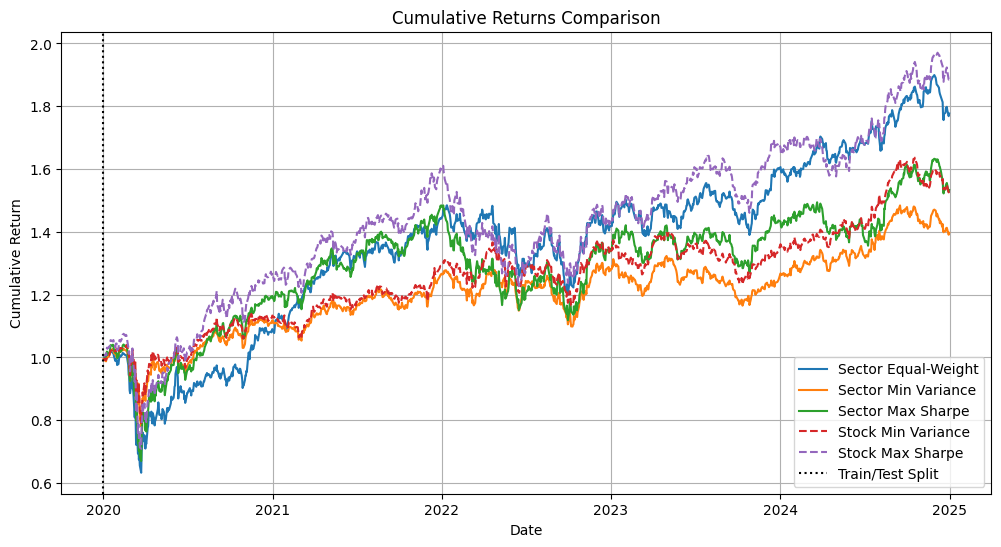


Risk Metrics Comparison (Testing Period):

Sector Equal-Weight:
Maximum Drawdown: -0.3801
Sortino Ratio: 0.6716
VaR (95%): -0.0170
CVaR (95%): -0.0311

Sector Min Variance:
Maximum Drawdown: -0.2407
Sortino Ratio: 0.4855
VaR (95%): -0.0136
CVaR (95%): -0.0229

Sector Max Sharpe:
Maximum Drawdown: -0.3563
Sortino Ratio: 0.5206
VaR (95%): -0.0174
CVaR (95%): -0.0301

Stock Min Variance:
Maximum Drawdown: -0.2395
Sortino Ratio: 0.6236
VaR (95%): -0.0134
CVaR (95%): -0.0226

Stock Max Sharpe:
Maximum Drawdown: -0.3405
Sortino Ratio: 0.7347
VaR (95%): -0.0177
CVaR (95%): -0.0309


In [19]:
# Calculate cumulative returns for all portfolios
plt.figure(figsize=(12, 6))

# Plot sector portfolios
for name, weights in portfolios.items():
    portfolio_returns = test_sector_returns @ weights
    cum_returns = (1 + portfolio_returns).cumprod()
    plt.plot(cum_returns.index, cum_returns, 
             label=f'Sector {name}', linestyle='-')

# Plot individual stock portfolios from Part 2
individual_portfolios = {
    'Min Variance': min_var_result.x,
    'Max Sharpe': max_sharpe_result.x
}

for name, weights in individual_portfolios.items():
    portfolio_returns = test_returns @ weights
    cum_returns = (1 + portfolio_returns).cumprod()
    plt.plot(cum_returns.index, cum_returns, 
             label=f'Stock {name}', linestyle='--')

plt.axvline(x=pd.to_datetime(split_date), color='black', 
            linestyle=':', label='Train/Test Split')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Compare risk metrics
print("\nRisk Metrics Comparison (Testing Period):")
all_portfolios = {
    'Sector Equal-Weight': np.ones(n_sectors)/n_sectors,
    'Sector Min Variance': sector_min_var_result.x,
    'Sector Max Sharpe': sector_max_sharpe_result.x,
    'Stock Min Variance': min_var_result.x,
    'Stock Max Sharpe': max_sharpe_result.x
}

for name, weights in all_portfolios.items():
    print(f"\n{name}:")
    if 'Sector' in name:
        returns_series = test_sector_returns @ weights
    else:
        returns_series = test_returns @ weights
    
    metrics = calculate_risk_metrics(returns_series)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")